In [4]:
import os
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [8]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from PIL import Image 
from skimage.io import imread
import cv2

K.clear_session()

# <b> MODEL TRAINING </b>

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

n_classes = 20
batch_size = 32
img_width, img_height = 299, 299

train_data_dir = '/kaggle/input/indian-food-classification/dataset/Dataset/train'

# Data Augmentation with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

val_data_dir = '/kaggle/input/indian-food-classification/dataset/Dataset/val'

val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 3996 images belonging to 20 classes.
Found 1250 images belonging to 20 classes.


In [10]:
class_map = train_generator.class_indices
class_map

{'burger': 0,
 'butter_naan': 1,
 'chai': 2,
 'chapati': 3,
 'chole_bhature': 4,
 'dal_makhani': 5,
 'dhokla': 6,
 'fried_rice': 7,
 'idli': 8,
 'jalebi': 9,
 'kaathi_rolls': 10,
 'kadai_paneer': 11,
 'kulfi': 12,
 'masala_dosa': 13,
 'momos': 14,
 'paani_puri': 15,
 'pakode': 16,
 'pav_bhaji': 17,
 'pizza': 18,
 'samosa': 19}

## Training the model

In [11]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

nb_train_samples = 3583 
nb_validation_samples = 1089

inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='v1_inceptionV3', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_v1_inceptionV3.log')

history = model.fit(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=val_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=20,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/20
111/111 [==============================] - 237s 2s/step - loss: 3.2170 - accuracy: 0.0669 - val_loss: 2.9554 - val_accuracy: 0.1921

Epoch 00001: val_loss improved from inf to 2.95541, saving model to v1_inceptionV3
Epoch 2/20
111/111 [==============================] - 183s 2s/step - loss: 2.9527 - accuracy: 0.1947 - val_loss: 2.7250 - val_accuracy: 0.3539

Epoch 00002: val_loss improved from 2.95541 to 2.72498, saving model to v1_inceptionV3
Epoch 3/20
111/111 [==============================] - 181s 2s/step - loss: 2.7026 - accuracy: 0.3275 - val_loss: 2.4692 - val_accuracy: 0.4559

Epoch 00003: val_loss improved from 2.72498 to 2.46924, saving model to v1_inceptionV3
Epoch 4/20
111/111 [==============================] - 180s 2s/step - loss: 2.4273 - accuracy: 0.4300 - val_loss: 2.1754 - val_accuracy: 0.5607

Epoch 00004: val_loss improved from 2.46924 to 2.17544, saving model to v1_inceptionV3
Epoch 5/20
111/

In [13]:
model.save('model_v1_inceptionV3.h5')

In [14]:
K.clear_session()
path_to_model='./model_v1_inceptionV3.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [15]:
test_data_dir = '../input/indian-food-classification/test'

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 585 images belonging to 20 classes.


In [16]:
scores = model.evaluate_generator(test_generator)

print("Test Accuracy: {:.3f}".format(scores[1]))

Test Accuracy: 0.846


In [19]:
category={
    0: ['burger','Burger'], 1: ['butter_naan','Butter Naan'], 2: ['chai','Chai'],
    3: ['chapati','Chapati'], 4: ['chole_bhature','Chole Bhature'], 5: ['dal_makhani','Dal Makhani'],
    6: ['dhokla','Dhokla'], 7: ['fried_rice','Fried Rice'], 8: ['idli','Idli'], 9: ['jalegi','Jalebi'],
    10: ['kathi_rolls','Kaathi Rolls'], 11: ['kadai_paneer','Kadai Paneer'], 12: ['kulfi','Kulfi'],
    13: ['masala_dosa','Masala Dosa'], 14: ['momos','Momos'], 15: ['paani_puri','Paani Puri'],
    16: ['pakode','Pakode'], 17: ['pav_bhaji','Pav Bhaji'], 18: ['pizza','Pizza'], 19: ['samosa','Samosa']
}

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(category[index][1]))
    plt.imshow(img_array)
    
def predict_dir(filedir,model):
    cols=5
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    fig=plt.figure(1, figsize=(25, 25))
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(299, 299))
        img_array = image.img_to_array(img_)
        
        img_processed = np.expand_dims(img_array, axis=0) 

        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=category.get(index)[0]
        if pred==true:
            pos+=1
        
        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[1], pad = 10,size=18)
        plt.imshow(img_array)

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()    

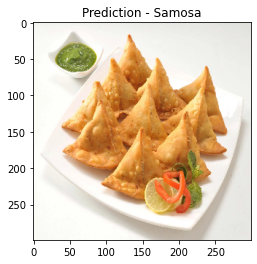

In [21]:
predict_image('/kaggle/input/test-samosa/Indian-samosa-chutney.webp',model)

## Saving the model

In [ ]:
model.save('model_v1_inceptionV3.h5')

## Accuracy and Loss curves

In [ ]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(history)
plot_loss(history)

# <b> PREDICTIONS </b>

## Load the model

In [ ]:
K.clear_session()
path_to_model='./model_v1_inceptionV3.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

## Testing model on test set 

In [ ]:
test_data_dir = '../input/indian-food-classification/test'

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

In [ ]:
scores = model.evaluate_generator(test_generator)

print("Test Accuracy: {:.3f}".format(scores[1]))

## Function to predict single image or predict all images from a directory

In [ ]:
category={
    0: ['burger','Burger'], 1: ['butter_naan','Butter Naan'], 2: ['chai','Chai'],
    3: ['chapati','Chapati'], 4: ['chole_bhature','Chole Bhature'], 5: ['dal_makhani','Dal Makhani'],
    6: ['dhokla','Dhokla'], 7: ['fried_rice','Fried Rice'], 8: ['idli','Idli'], 9: ['jalegi','Jalebi'],
    10: ['kathi_rolls','Kaathi Rolls'], 11: ['kadai_paneer','Kadai Paneer'], 12: ['kulfi','Kulfi'],
    13: ['masala_dosa','Masala Dosa'], 14: ['momos','Momos'], 15: ['paani_puri','Paani Puri'],
    16: ['pakode','Pakode'], 17: ['pav_bhaji','Pav Bhaji'], 18: ['pizza','Pizza'], 19: ['samosa','Samosa']
}

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(category[index][1]))
    plt.imshow(img_array)
    
def predict_dir(filedir,model):
    cols=5
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    fig=plt.figure(1, figsize=(25, 25))
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(299, 299))
        img_array = image.img_to_array(img_)
        
        img_processed = np.expand_dims(img_array, axis=0) 

        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=category.get(index)[0]
        if pred==true:
            pos+=1
        
        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[1], pad = 10,size=18)
        plt.imshow(img_array)

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()

- <h3> Single image prediction </h3>

In [ ]:
predict_image('../input/indian-food-classification/test/burger/images (16).jpg',model)

- <h3> Predicting category </h3>

In [ ]:
predict_dir("../input/indian-food-classification/test/masala_dosa",model)

## Let's plot a confusion matrix for all the food items

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

img_width, img_height = 299, 299

def labels_confusion_matrix():
    folder_path="../input/indian-food-classification/test"
    
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i
    
    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):
        
        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]
        
        for j in os.listdir(os.path.join(folder_path,i)):
            
            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(img_height, img_width))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0) 
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):

    cmap="viridis"
    cm_plot_labels = [i for i in range(20)]

    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.1) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm, annot=True,cmap=cmap) # font size
#     bottom,top=s.get_ylim()
#     s.set_ylim(bottom+0.6,top-0.6)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

In [ ]:
y_true,y_pred=labels_confusion_matrix()
print_confusion_matrix(y_true,y_pred)

<span style="font-size:21px;color:blue"><b>So far, So good!</b></span>
<hr>

<h1> <b> MODEL LEARNING VISUALIZATIONS </b></h1>

### SOME HELPER FUNCTIONS WHICH WILL ENABLE US TO VISUALIZE HOW NEURAL NETWORK WORKS AND PERFORMS!

In [ ]:
def get_activations(img, model_activations):
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255. 
    plt.imshow(img[0])
    plt.show()
    return model_activations.predict(img)

def show_activations(activations, layer_names):
    
    images_per_row = 16

    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names, activations):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :,col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()
    
def activation_conv():
    first_convlayer_activation = activations[0]
    second_convlayer_activation = activations[3]
    third_convlayer_activation = activations[6]
    f,ax = plt.subplots(1,3, figsize=(10,10))
    ax[0].imshow(first_convlayer_activation[0, :, :, 3], cmap='viridis')
    ax[0].axis('OFF')
    ax[0].set_title('Conv2d_1')
    ax[1].imshow(second_convlayer_activation[0, :, :, 3], cmap='viridis')
    ax[1].axis('OFF')
    ax[1].set_title('Conv2d_2')
    ax[2].imshow(third_convlayer_activation[0, :, :, 3], cmap='viridis')
    ax[2].axis('OFF')
    ax[2].set_title('Conv2d_3')
    
    
def get_attribution(food):
    
    tf.compat.v1.disable_eager_execution()
    
    img = image.load_img(food, target_size=(299, 299))
    img = image.img_to_array(img) 
    img /= 255. 
    f,ax = plt.subplots(1,3, figsize=(15,15))
    ax[0].imshow(img)
    
    img = np.expand_dims(img, axis=0)
    model = load_model('./model_v1_inceptionV3.h5')
        
    preds = model.predict(img)
    class_id = np.argmax(preds[0])
    ax[0].set_title("Input Image")
    class_output = model.output[:, class_id]
    last_conv_layer = model.get_layer("mixed10")
    
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img])
    for i in range(2048):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    ax[1].imshow(heatmap)
    ax[1].set_title("Heat map")
    
    
    act_img = cv2.imread(food)
    heatmap = cv2.resize(heatmap, (act_img.shape[1], act_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(act_img, 0.6, heatmap, 0.4, 0)
    cv2.imwrite('classactivation.png', superimposed)
    img_act = image.load_img('classactivation.png', target_size=(299, 299))
    ax[2].imshow(img_act)
    ax[2].set_title("Class Activation")
    plt.show()
    return preds

## MODEL LAYERS 

In [ ]:
print("Total layers in the model : ",len(model.layers),"\n")

# We start with index 1 instead of 0, as input layer is at index 0
layers = [layer.output for layer in model.layers[1:11]]
# We now initialize a model which takes an input and outputs the above chosen layers
activations_output = models.Model(inputs=model.input, outputs=layers)
# print(layers)

layer_names = []
for layer in model.layers[1:11]: 
    layer_names.append(layer.name)
    
print("First 10 layers which we can visualize are -> ", layer_names)


<span style="font-size:18px;color:blue"><b>Our model has 315 layers with InceptionV3 architecture!</b></span>
<br><br>
<span style="font-size:18px;color:blue"><b>Whoa! That's a lot to process at first, so let's just stick with 10 layers for now and visualize these first to see how neural networks classify.</b></span>
<hr>

# <b>LAYER WISE ACTIVATIONS</b>

In [ ]:
food = '../input/indian-food-classification/dataset/Dataset/val/pizza/155.jpg'
activations = get_activations(food,activations_output)
show_activations(activations, layer_names)

## Let's show the activation outputs of Conv2D layer (we have three of them in first 10 layers) to compare how layers get abstract with depth.

In [ ]:
activation_conv()

## This time let's visualize some other food item's layer.

In [ ]:
food = '../input/indian-food-classification/dataset/Dataset/val/idli/065.jpg'
activations = get_activations(food,activations_output)
show_activations(activations, layer_names)

In [ ]:
activation_conv()

<h2><span style="color:blue">NOW THIS IS WHERE THINGS WILL GET INTERESTING!</span></h2>

- <span style="font-size:17px;"> So far we were doing activation maps visualization which helped us understand how the input is transformed from one layer to another as it goes through several operations. </span>

- <span style="font-size:17px;"> At the end of training, we want the model to classify or detect objects based on features which are specific to the class.</span>

- <span style="font-size:17px;"> To validate how model attributes the features to class output, we can generate heat maps using gradients to find out which regions in the input images were instrumental in determining the class. </span>

# <b>GENERATING HEATMAPS</b>

In [ ]:
pred = get_attribution('../input/indian-food-classification/dataset/Dataset/val/idli/065.jpg')

In [ ]:
pred2=get_attribution('../input/indian-food-classification/test/fried_rice/images (5).jpg')

In [ ]:
pred3=get_attribution('../input/indian-food-classification/test/chai/images (3).jpg')

In [ ]:
pred4=get_attribution('../input/indian-food-classification/test/jalebi/images (4).jpg')

In [ ]:
pred5=get_attribution('../input/indian-food-classification/test/chole_bhature/images (10).jpg')

<h2><span style="color:green">WOW! WE DID IT!</span></h2>
<hr></hr>
<ol>
    <h3>
        <li>In the above plot, we see on left the input image passed to the model, heat map in the middle and the class activation map on right</li><br>
        <li>Heat map gives a visual of what regions in the image were used in determining the class of the image</li><br>
        <li>Now it's clearly visible what a model looks for in an image if it has to be classified as an idli!</li>
    </h3>
</ol>

## Downloading random image from net to predict and generate heatmap

In [ ]:
!wget -O download.jpg https://www.cookwithmanali.com/wp-content/uploads/2015/01/Restaurant-Style-Dal-Makhani-Recipe.jpg
    
model_load = load_model('./model_v1_inceptionV3.h5')

<span style="font-size:16px;"><b>This image was given to confuse the model as both classes <u>Butter naan</u> and <u>Dal makhni</u> are present. But it predicted dal makhni and why was that?<br><br>Because the output layer inside the model computed high activations for dal makhni object. It does happen sometimes due to centralized nature of model's focus area. </b></span>

In [ ]:
pred = get_attribution('download.jpg')

<hr>
<h2><div style="color:purple;text-align: center;font-weight:bold;">THANK YOU FOR BEARING WITH ME!</div></h2>
<hr>
<h2><center>If you liked this kernel or the yummy dataset, please consider upvoting.<br>Happy Kaggling.</center></h2>
<hr>
